# "Diabetes Predict:Predictive Modeling for Early Diabetes Detection"

 <b>The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.<b>

<b>The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_csv("C:/Users/Malika Kaur/Downloads/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.shape

(768, 9)

In [10]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [14]:
#replace 0 as nan because 0 indicate as missing values in each column
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
diabetes_df_copy= df.copy(deep=True)
diabetes_df_copy[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]]=diabetes_df_copy[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]].replace(0, np.NaN)


# to understand the distribution of data  to fill nana values

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

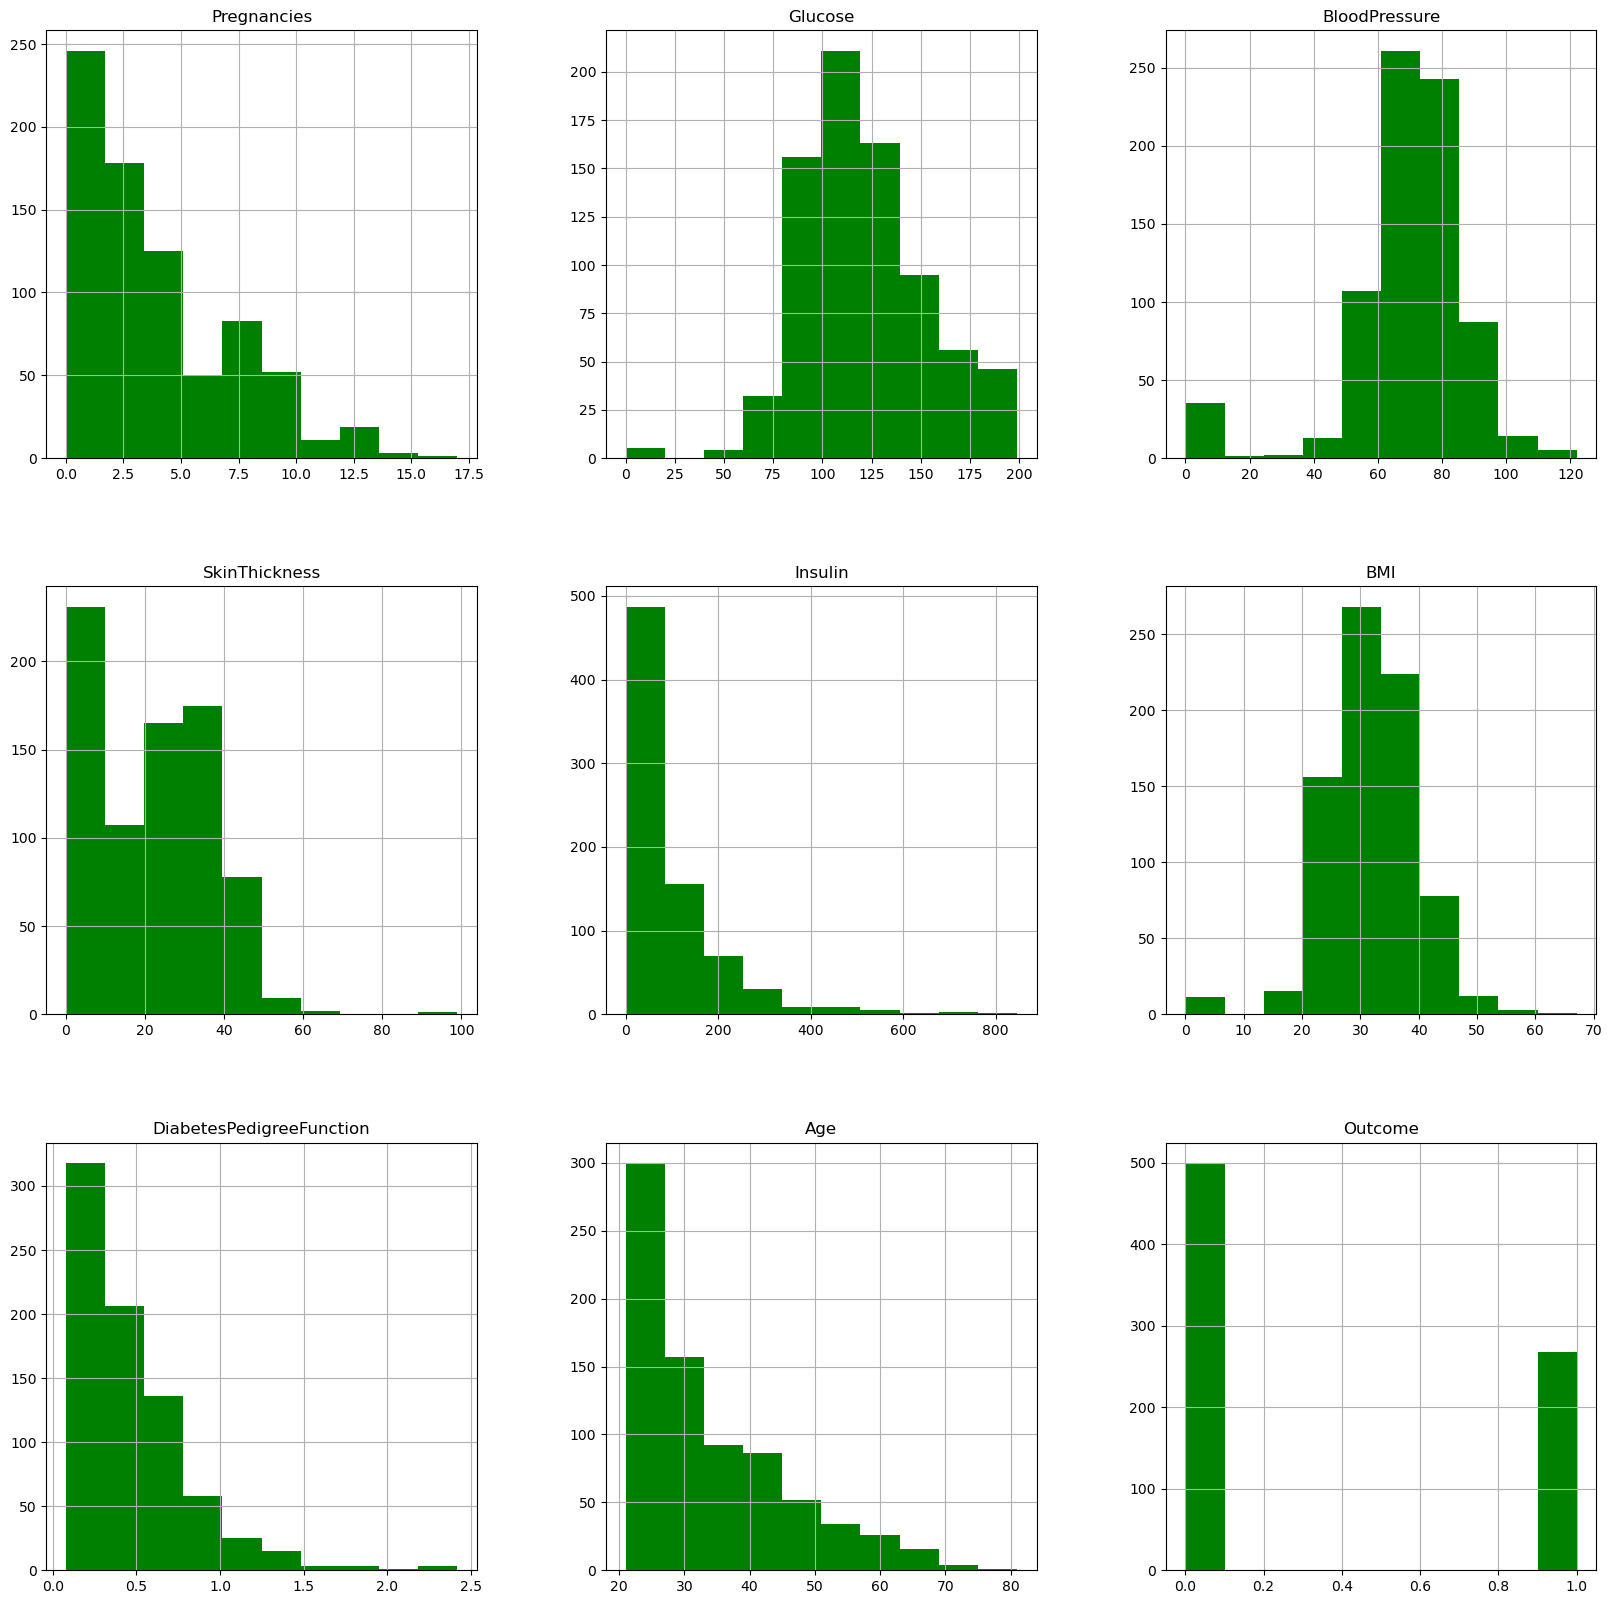

In [15]:
df.hist(figsize = (20,20),color="green")

In [16]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [17]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# plotting after removing nan values

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

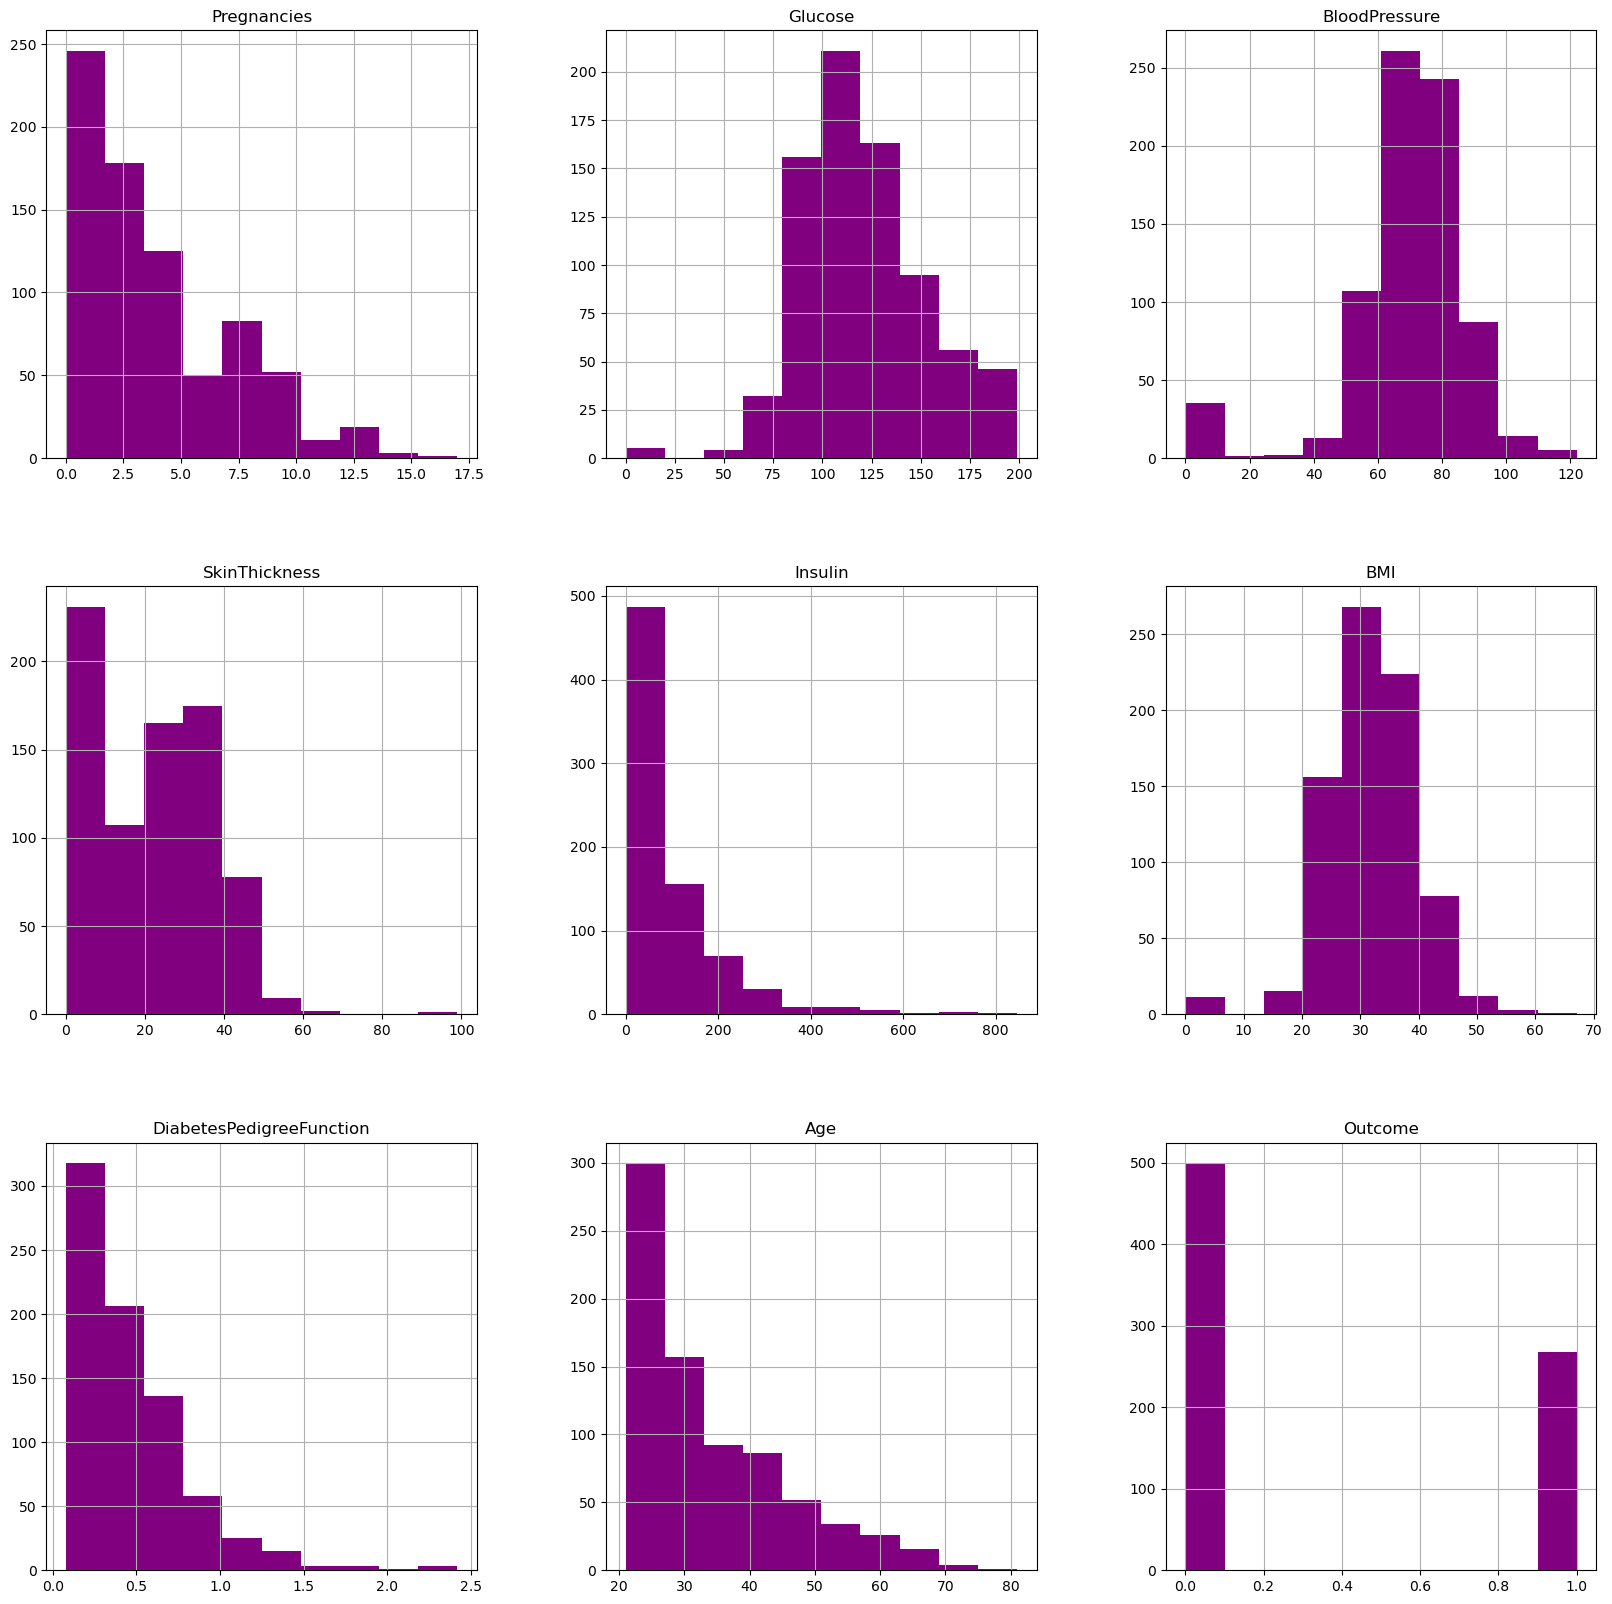

In [18]:
df.hist(figsize = (20,20),color="purple")

<Axes: >

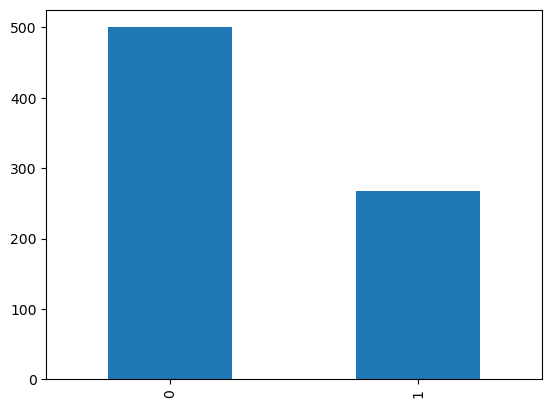

In [19]:
#most of womens does not have diabetes
#checkimg probability have diabeties or not

df.Outcome.value_counts().plot(kind="bar")

In [20]:
diabetes_df_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


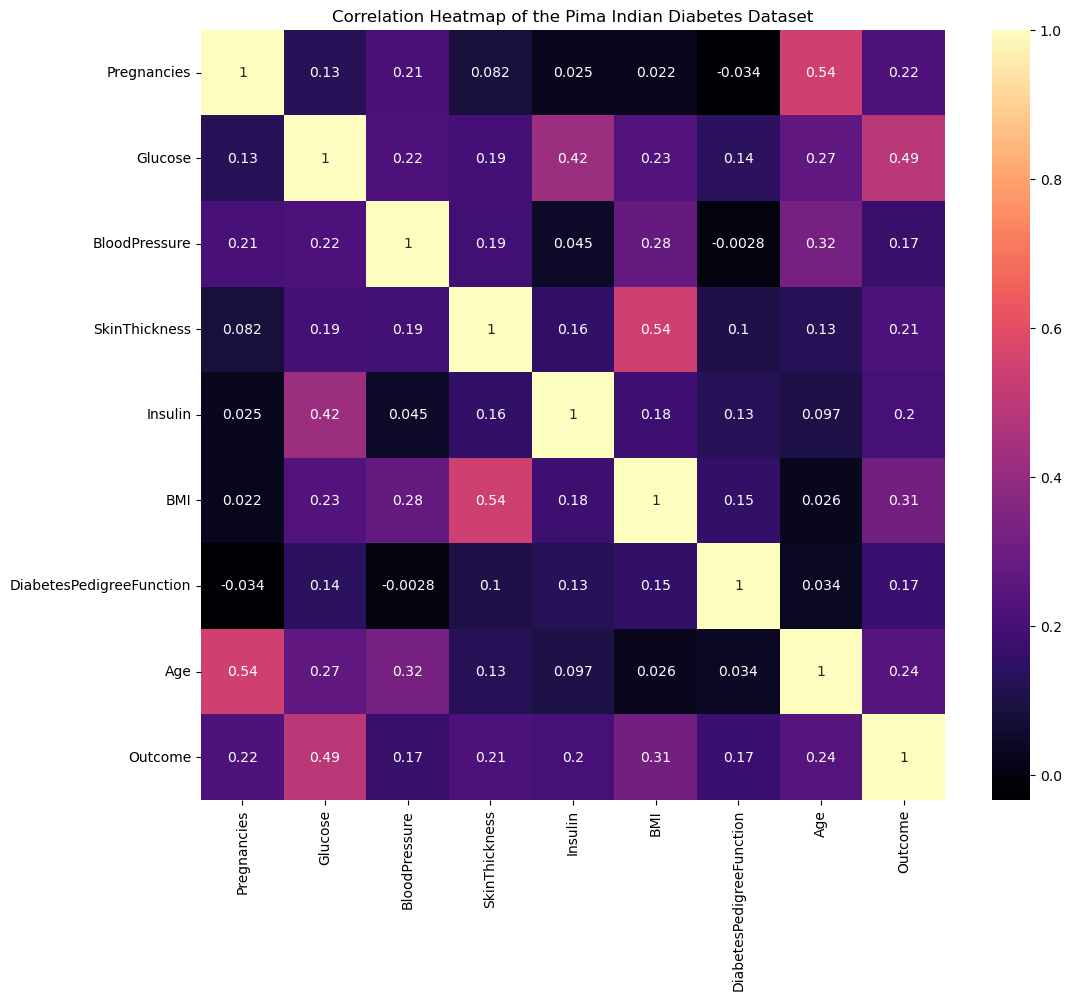

In [21]:
# heatmap for clean data
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_df_copy.corr(), cmap="magma", annot=True)
plt.title('Correlation Heatmap of the Pima Indian Diabetes Dataset')
plt.show()

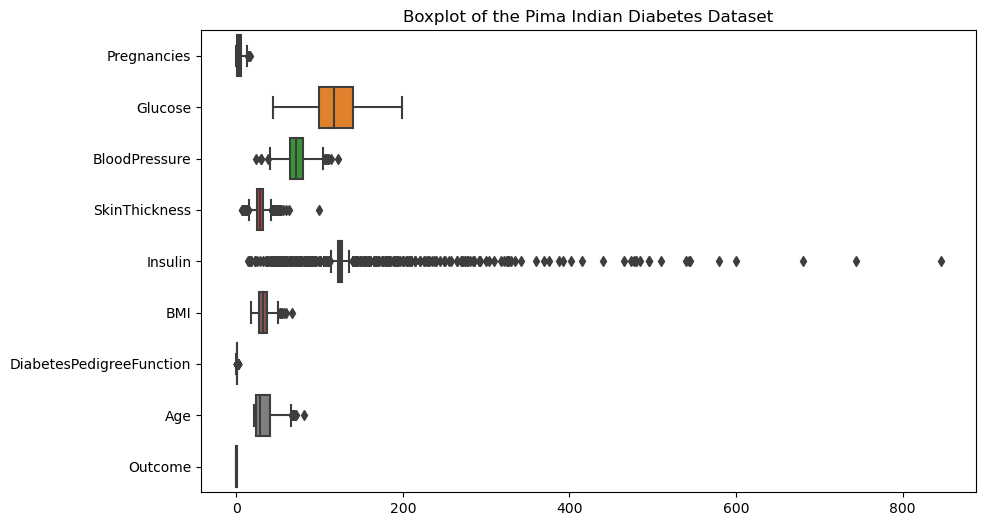

In [22]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_df_copy,orient='h' )

plt.title('Boxplot of the Pima Indian Diabetes Dataset')
plt.show()

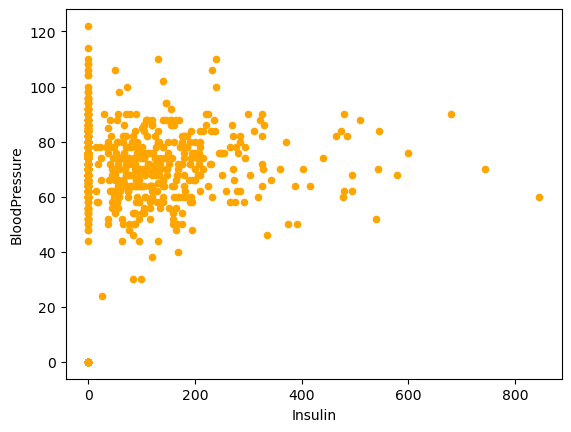

In [23]:
df.plot(kind='scatter',x='Insulin',y='BloodPressure',color='orange')
plt.show()

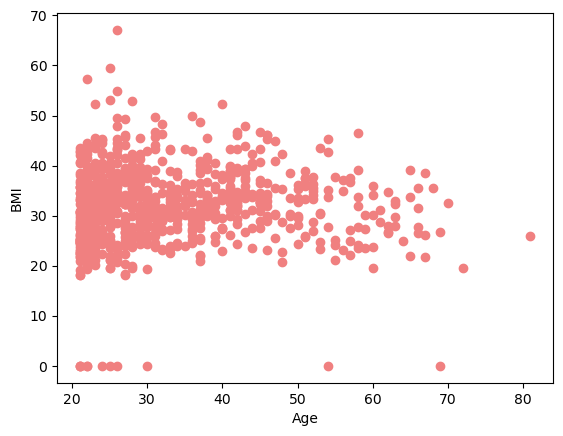

In [24]:
plt.scatter(df['Age'],df['BMI'],color='lightcoral')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


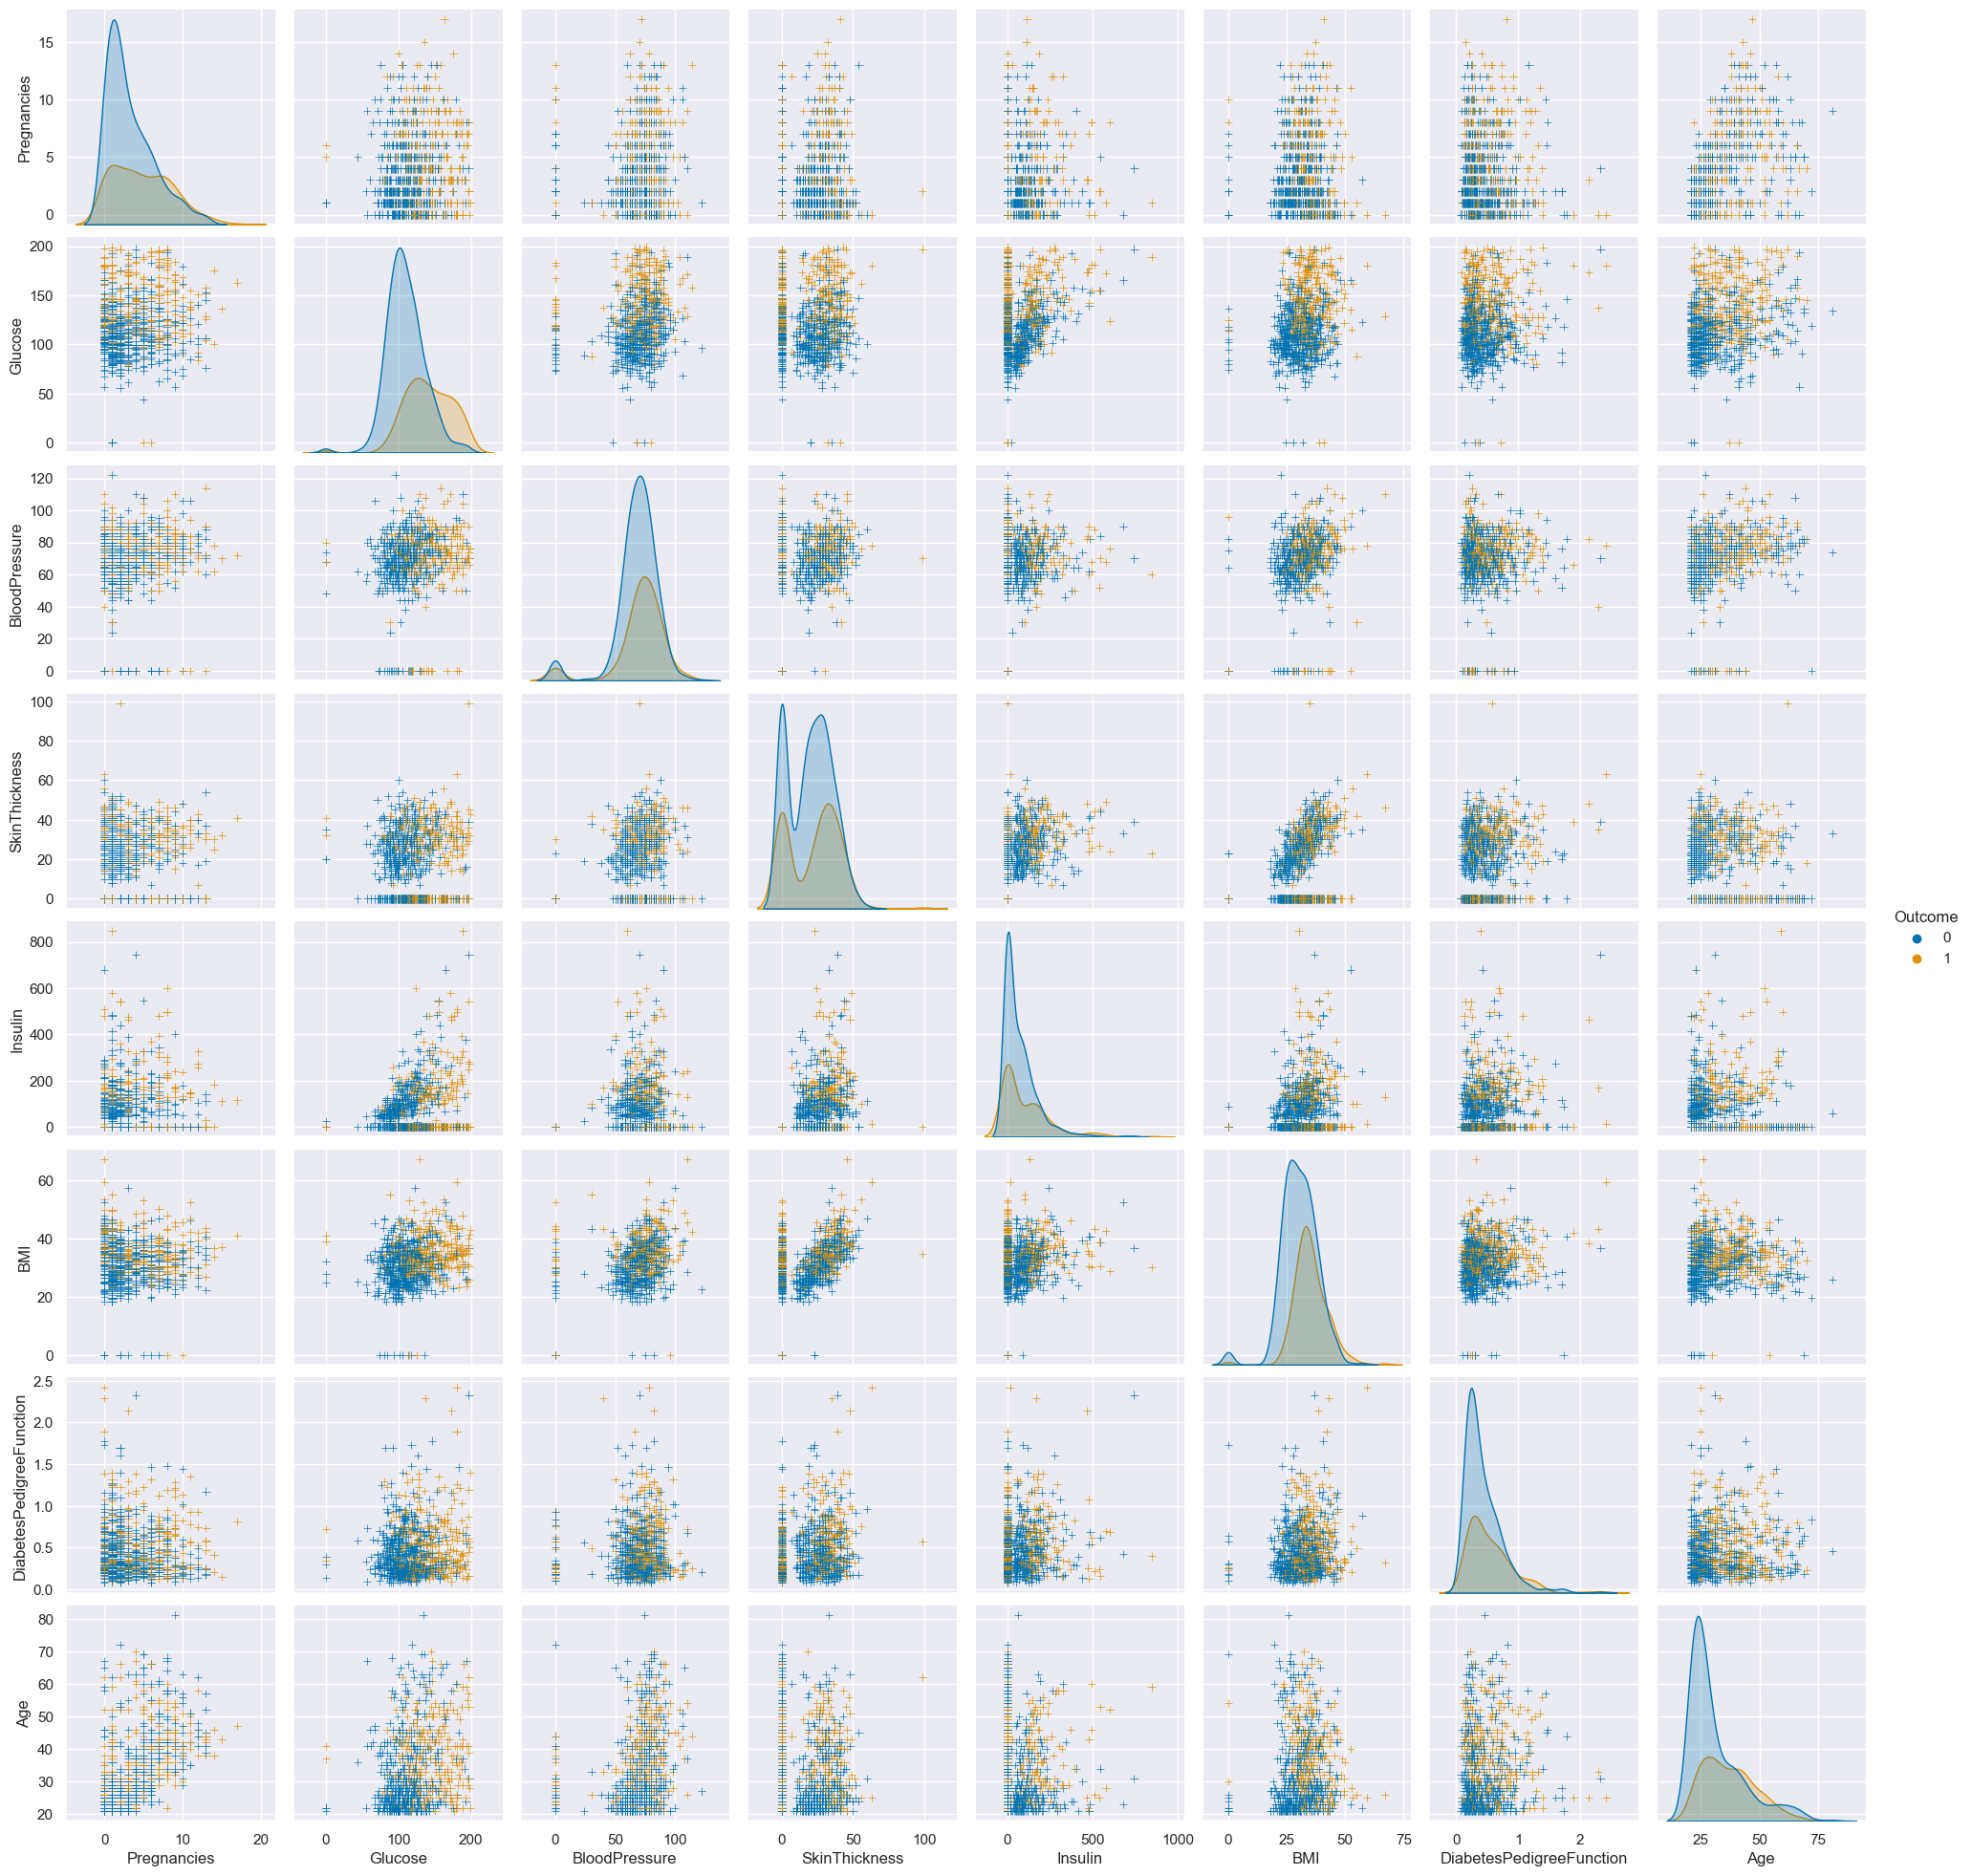

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.pairplot(df,hue='Outcome',markers='+',palette='colorblind')
plt.show()

<Axes: xlabel='Age', ylabel='Outcome'>

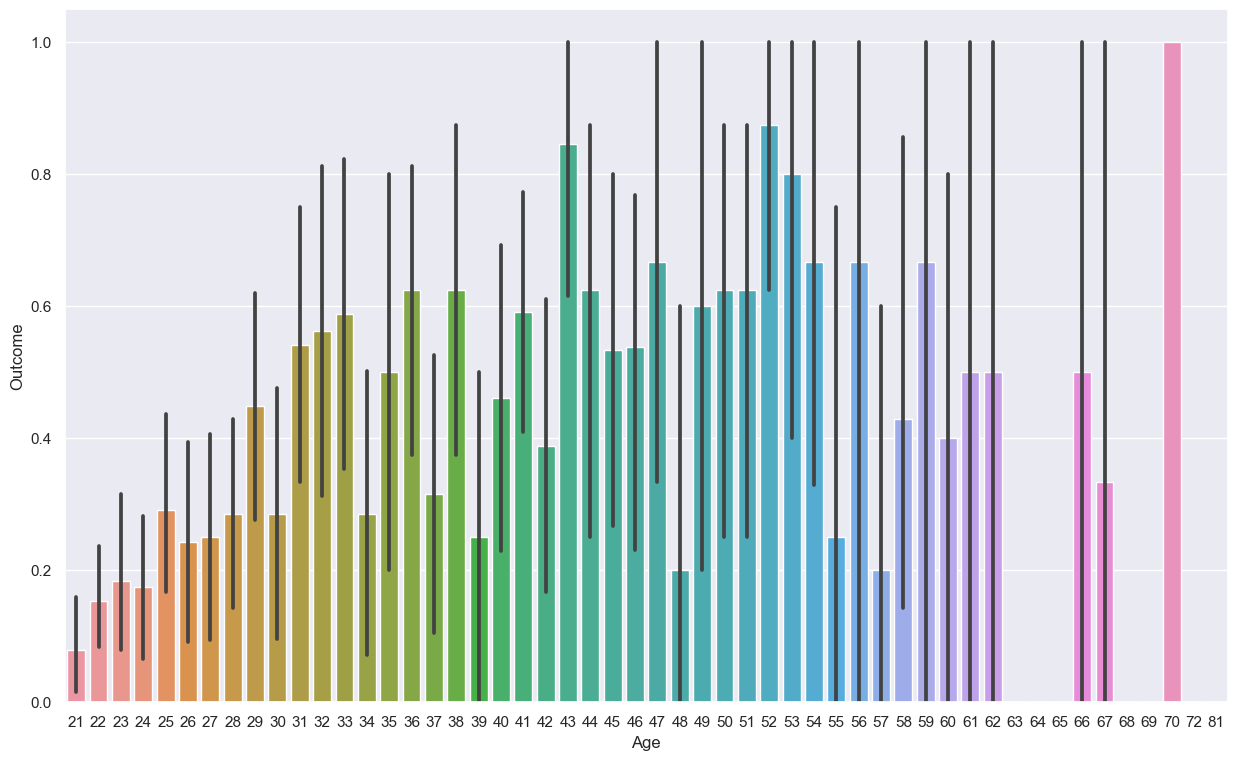

In [26]:
plt.figure(figsize=(15, 9))
sns.barplot(x='Age',y='Outcome',data=df)

In [27]:
X = diabetes_df_copy.drop("Outcome", axis=1).values
y = diabetes_df_copy["Outcome"].values

In [28]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=42, stratify=y)


In [29]:
# Apply KNN 
Neighbors= np.arange(1, 30)
train_accuracies = []
test_accuracies = []
for neighbor in Neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_train,y_train)
    
    train_accuracies.append(knn.score(X_train,y_train))
    test_accuracies.append(knn.score(X_test,y_test))
print(Neighbors, '\n', train_accuracies, '\n', test_accuracies)  

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 [1.0, 0.8169934640522876, 0.8562091503267973, 0.8300653594771242, 0.8235294117647058, 0.8104575163398693, 0.7973856209150327, 0.7973856209150327, 0.7777777777777778, 0.7712418300653595, 0.7908496732026143, 0.7908496732026143, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7581699346405228, 0.7581699346405228, 0.7777777777777778, 0.7712418300653595, 0.7647058823529411, 0.7843137254901961, 0.7581699346405228, 0.7712418300653595, 0.7647058823529411, 0.7712418300653595, 0.7712418300653595, 0.7647058823529411, 0.7712418300653595, 0.7581699346405228] 
 [0.6796747967479675, 0.6910569105691057, 0.71869918699187, 0.7170731707317073, 0.7317073170731707, 0.7235772357723578, 0.7203252032520325, 0.7170731707317073, 0.7300813008130081, 0.7235772357723578, 0.7105691056910569, 0.7154471544715447, 0.7235772357723578, 0.7154471544715447, 0.7235772357723578, 0.7235772357723578, 0.7268292682926829, 0

In [30]:
max_train_score = max(train_accuracies)
train_scores_ind = [i for i, v in enumerate(train_accuracies) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [31]:
max_test_score = max(test_accuracies)
test_scores_ind = [i for i, v in enumerate(test_accuracies) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.33333333333333 % and k = [29]


In [32]:
# Try agin after scaling  the data 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [33]:
# Splitting data
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.2, random_state=42, stratify=y)


In [34]:
# Apply KNN 
Neighbors= np.arange(1, 30)
train_accuracies = []
test_accuracies = []
for neighbor in Neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_scaled_train,y_train)
    
    train_accuracies.append(knn.score(X_scaled_train,y_train))
    test_accuracies.append(knn.score(X_scaled_test,y_test))
print(Neighbors, '\n', train_accuracies, '\n', test_accuracies)   

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 [1.0, 0.8823529411764706, 0.8758169934640523, 0.8235294117647058, 0.8169934640522876, 0.8104575163398693, 0.8104575163398693, 0.7908496732026143, 0.7843137254901961, 0.7712418300653595, 0.7973856209150327, 0.7777777777777778, 0.7908496732026143, 0.7647058823529411, 0.7843137254901961, 0.7581699346405228, 0.7581699346405228, 0.7516339869281046, 0.7712418300653595, 0.7581699346405228, 0.7777777777777778, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7516339869281046, 0.738562091503268, 0.7516339869281046, 0.7320261437908496, 0.7581699346405228] 
 [0.7089430894308943, 0.71869918699187, 0.7121951219512195, 0.7105691056910569, 0.7365853658536585, 0.7317073170731707, 0.7414634146341463, 0.7268292682926829, 0.7528455284552845, 0.7365853658536585, 0.7560975609756098, 0.7463414634146341, 0.7528455284552845, 0.7284552845528456, 0.7463414634146341, 0.7365853658536585, 0.7479674796747967, 0.

In [35]:
max_test_score = max(test_accuracies)
test_scores_ind = [i for i, v in enumerate(test_accuracies) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.60975609756098 % and k = [11]


In [36]:
# Apply LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7479674796747967